In [1]:
print("Hello World")

Hello World


In [2]:
# Import libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
# Importing data

data = pd.read_csv("120-years-of-olympic-history-athletes-and-results/athlete_events.csv")
regions = pd.read_csv("120-years-of-olympic-history-athletes-and-results/noc_regions.csv")

print(data.head())

   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

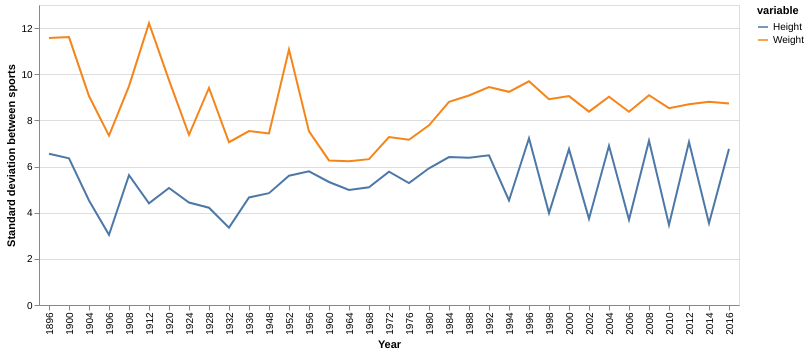

In [4]:
# standard deviation of weights between sports across years

# higher = more specialisation

mean_by_year = data.groupby(["Year","Sport"])["Weight","Height"].mean()

std_mean_by_year = mean_by_year.groupby(["Year"]).std().reset_index()

melted = std_mean_by_year.melt(id_vars=["Year"],value_vars=["Weight","Height"],value_name="Standard deviation between sports")

alt.Chart(melted).mark_line().encode(
    x='Year:O',
    y='Standard deviation between sports:Q',
    color='variable'
)

In [5]:
#goldMedalists = data[(data.Medal == 'Gold')]

In [6]:
# Try and understand this cell at your own risk

desc = pd.read_csv(
    "european-social-survey-ess-8-ed21-201617/variables.csv",
    dtype = {
        'Name': str,
        'Label': str,
        'Country_specific': object, # actually bool
        'Scale_type': str,
        'Type': str,
        'Format': str,
        'Valid': object, # can't use "id" as type
        'Invalid': object, # can't use "id" as type
        'Question': str,
        'Group': str
    }
)

def translate_format(format_string: str) -> str:
    return str
    # I tried being more specific I just kept getting errors
    # So we will just load data as if its all str's and deal with that later
    # Using "if "numeric" in format_string" trigger error due to "in"
#     try:
#         format_string.index("numeric")
#     except:
#         return int
#     else:
#         return str

desc['Format'] = desc['Format'].map(translate_format)
desc_cut = desc.filter(["Name","Format"])
data_dict = dict(zip(desc_cut['Name'], desc_cut['Format']))

# `data_dict` defines the the data type of each column in `data` in the next cell
print(len(data_dict))
print(data_dict["cntry"])


534
<class 'str'>


In [7]:
data = pd.read_csv(
    "european-social-survey-ess-8-ed21-201617/ESS8e02.1_F1.csv",
    dtype = data_dict
)

In [24]:
# A simple beginning for starting to learn how to incorporate interaction

import ipywidgets as widgets
from IPython.display import display
#print(desc.Group.unique())

interestGroup = widgets.Dropdown(
    # `e[6:]` remove "Group" substring from before each option
    # `desc.Group.unique()` gets all unique values in the `Group` column
    # `[2:]` removes first 2 options of `Country` and `Weights`
    options=[e[6:] for e in desc.Group.unique()[2:]],
    description='Interest:',
)
display(interestGroup)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        # Select questions group
        interested_desc = desc[(desc.Group == "Group " + interestGroup.value)]
        # Select non-country-specific questions
        interested_desc = interested_desc[interested_desc.Country_specific == "no"]
        #print(interested_desc.Name)
        # Merge with `data` to select desired questions by name
        merged = data.filter(interested_desc.Name)
        #print(merged["lrscale"])
        meaned = merged.astype(int).mean()
        print(meaned)

interestGroup.observe(on_change)

Dropdown(description='Interest:', options=('Media and social trust', 'Politics', 'Subjective well-being, socia…

polintr      2.598351
psppsgva     2.327956
actrolga     2.194224
psppipla     2.251943
cptppola     2.248992
trstprl      6.207110
trstlgl      6.981639
trstplc      6.973641
trstplt      4.855971
trstprt      5.233987
trstep      10.770631
trstun      11.454548
vote         1.446662
contplt      1.862708
wrkprty      1.971613
wrkorg       1.855205
badge        1.930362
sgnptit      1.783991
pbldmn       1.940365
bctprd       1.848649
pstplonl     1.858675
clsprty      1.694235
prtdgcl      4.356230
lrscale     15.623629
stflife      7.480884
stfeco       6.678104
stfgov       6.597472
stfdem       8.014914
stfedu       8.670331
stfhlth      6.200982
gincdif      2.222024
mnrgtjb      4.080294
freehms      2.293509
hmsfmlsh     3.962962
hmsacld      3.105954
euftf       11.621669
imsmetn      2.274765
imdfetn      2.636853
impcntr      2.713182
imbgeco      7.900939
imueclt      7.958929
imwbcnt      7.807579
dtype: float64


   Question   Opinion
0   polintr  2.598351
1  psppsgva  2.327956
2  actrolga  2.194224
3  psppipla  2.251943
4  cptppola  2.248992


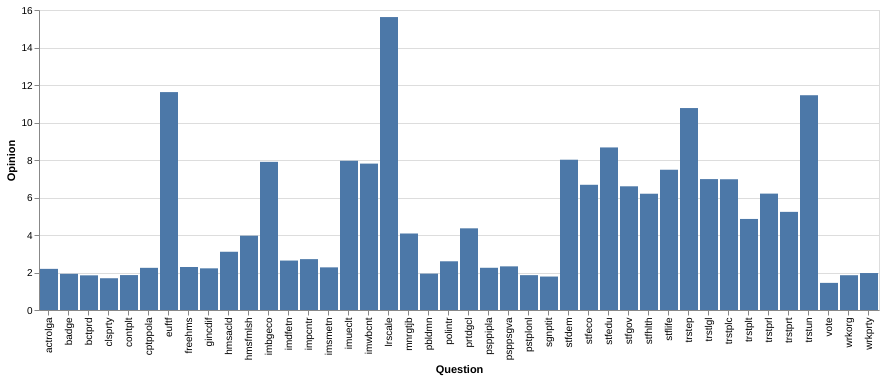

In [23]:
value = "Politics"
interested_desc = desc[(desc.Group == "Group " + value)]
interested_desc = interested_desc[interested_desc.Country_specific == "no"]
merged = data.filter(interested_desc.Name)
meaned = merged.astype(int).mean()
meaned_dataframe = meaned.reset_index() # change series to dataframe
meaned_dataframe.columns = ["Question","Opinion"]
print(meaned_dataframe.head())

test = alt.Chart(meaned_dataframe).mark_bar().encode(
    x="Question:O",
    y="Opinion:Q"
)

display(test)